## AlphaCare Insurance Solutions (ACIS) - EDA &Hypothesis Testing

#### Libraries

In [1]:
import sys
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set(style="darkgrid") 
# Get the current working directory
current_dir = os.getcwd()

# Append the parent directory to sys.path
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

# ignore warrnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
from scripts.alphacare_insurance_EDA import InsuranceEDA
from scripts.data_quality_checker import DataQualityChecker

#### Read and Understand Data

In [3]:
#Reading the txt file MachineLearningRating_v3.txt
file_path = '../data/MachineLearningRating_v3.txt'
df=pd.read_csv(file_path, delimiter='|')

In [4]:
# inspect data, print top 5 
df.head(5)

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [5]:
# Initialize EDA class with the dataset file path
eda = InsuranceEDA(df)
dq_checker=DataQualityChecker(df)

### Data Summarization


##### Descriptive Statistics

In [6]:
df.describe()

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,2.204560e+05,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2.255311e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,5.645157e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,1.350000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2.800000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


##### Data Structure

In [7]:
dq_checker.check_data_types(df)

,Column,Actual Data Type,Expected Data Type,Match
0,UnderwrittenCoverID,int64,int64,True
1,PolicyID,int64,int64,True
2,TransactionMonth,object,object,True
3,IsVATRegistered,bool,bool,True
4,Citizenship,object,object,True
5,LegalType,object,object,True
6,Title,object,object,True
7,Language,object,object,True
8,Bank,object,object,True
9,AccountType,object,object,True


In [8]:
# Fix data type format in proper format
df['VehicleIntroDate']=pd.to_datetime(df['VehicleIntroDate'],errors='coerce')
df['TransactionMonth']=pd.to_datetime(df['TransactionMonth'], errors='coerce')
df['RegistrationYear']=(df['RegistrationYear']).astype(int)

In [9]:
# filter numerical and catagorical columns for further processing
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()

### Data Quality Assessment

In [10]:
# Display missing value report
dq_checker.check_missing_values()

,Column,Missing Count,Missing Percentage
0,UnderwrittenCoverID,0,0.000000
1,PolicyID,0,0.000000
2,TransactionMonth,0,0.000000
3,IsVATRegistered,0,0.000000
4,Citizenship,0,0.000000
5,LegalType,0,0.000000
6,Title,0,0.000000
7,Language,0,0.000000
8,Bank,145961,14.594670
9,AccountType,40232,4.022806


In [11]:
# Check is there is a duplicate values
dq_checker.check_duplicates()

'No duplicate rows found in the DataFrame.'

In [12]:
# cleaning the data based on the datatype
# if catagorical we use mode
for i in categorical_cols:
    if df[i].isnull().any():  # Check if there is any null value in the column
        df[i].fillna(df[i].mode()[0], inplace=True)  # Fill with mode
#if numerical we use mean
for i in numerical_cols:
    if df[i].isnull().any():  # Check if there is any null value in the column
        df[i].fillna(df[i].mean(), inplace=True)  # Fill with mean

In [13]:
dq_checker.check_missing_values()

,Column,Missing Count,Missing Percentage
0,UnderwrittenCoverID,0,0.000000
1,PolicyID,0,0.000000
2,TransactionMonth,0,0.000000
3,IsVATRegistered,0,0.000000
4,Citizenship,0,0.000000
5,LegalType,0,0.000000
6,Title,0,0.000000
7,Language,0,0.000000
8,Bank,0,0.000000
9,AccountType,0,0.000000


In [14]:
eda.summarize_data(df)

Data Summary:
        UnderwrittenCoverID      PolicyID               TransactionMonth  \
count         1.000098e+06  1.000098e+06                        1000098   
mean          1.048175e+05  7.956682e+03  2015-02-28 10:49:29.147423744   
min           1.000000e+00  1.400000e+01            2013-10-01 00:00:00   
25%           5.514300e+04  4.500000e+03            2015-01-01 00:00:00   
50%           9.408300e+04  7.071000e+03            2015-04-01 00:00:00   
75%           1.391900e+05  1.107700e+04            2015-06-01 00:00:00   
max           3.011750e+05  2.324600e+04            2015-08-01 00:00:00   
std           6.329371e+04  5.290039e+03                            NaN   

         PostalCode        mmcode  RegistrationYear     Cylinders  \
count  1.000098e+06  1.000098e+06      1.000098e+06  1.000098e+06   
mean   3.020601e+03  5.487770e+07      2.010225e+03  4.046642e+00   
min    1.000000e+00  4.041200e+06      1.987000e+03  0.000000e+00   
25%    8.270000e+02  6.005692e+07

## Exploratory Data Analysis

### Univariate Analysis

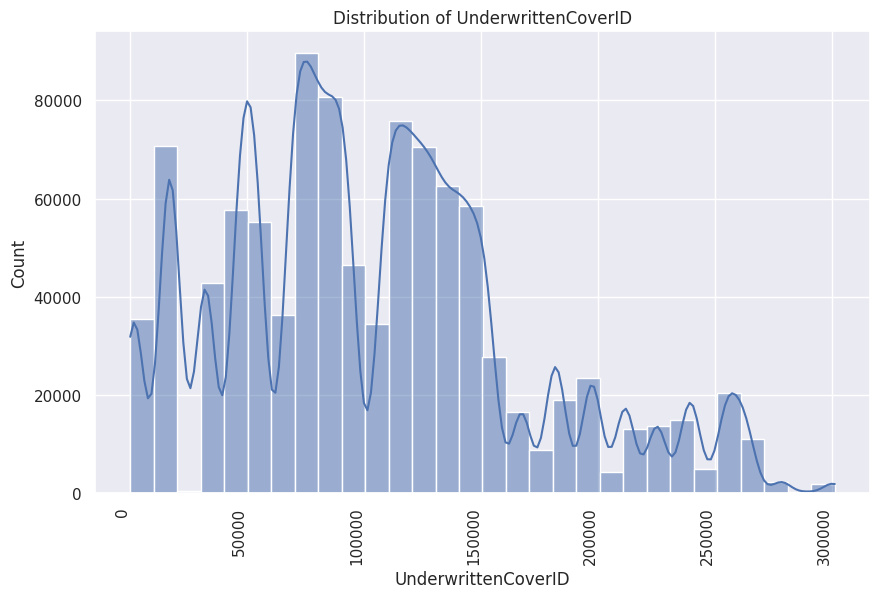

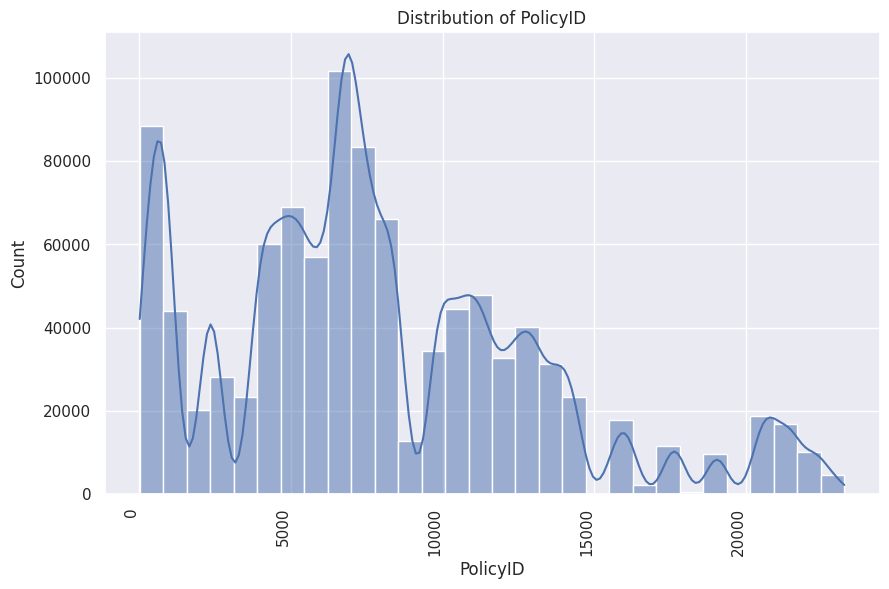

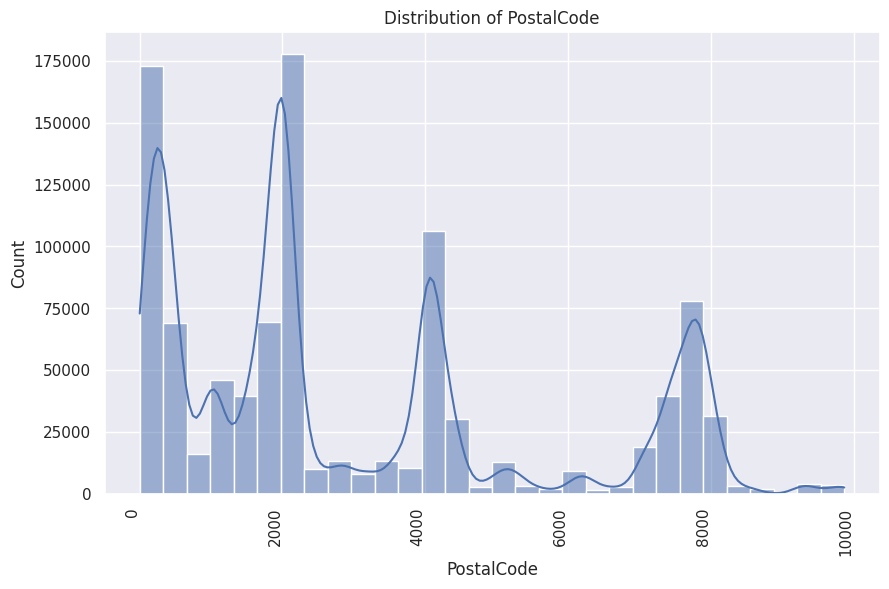

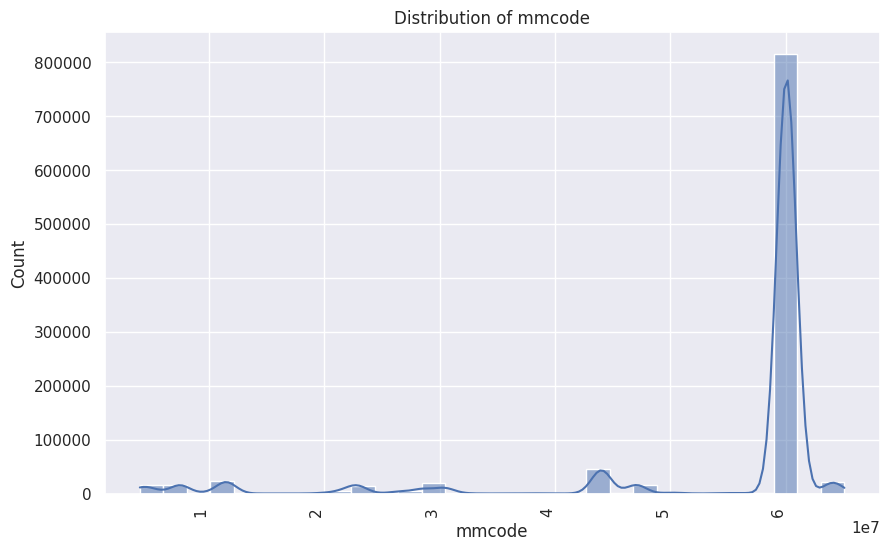

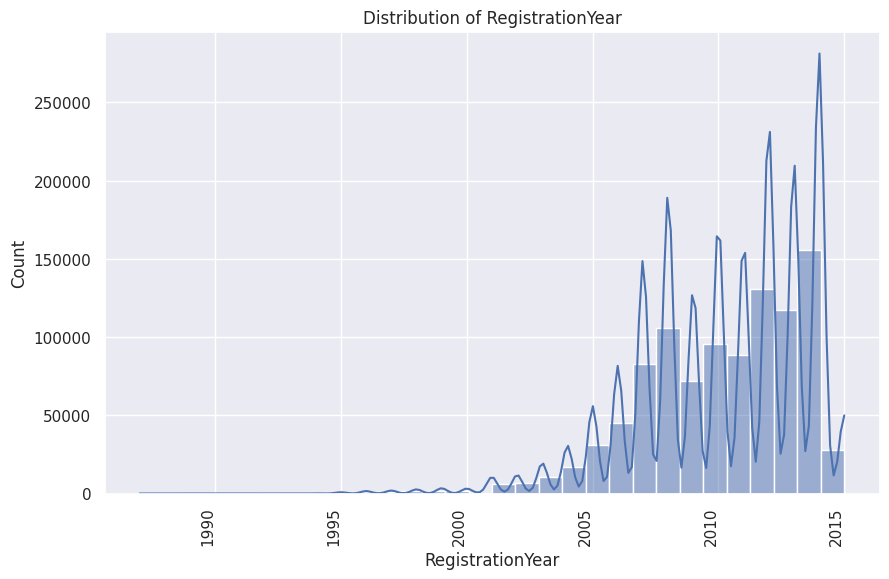

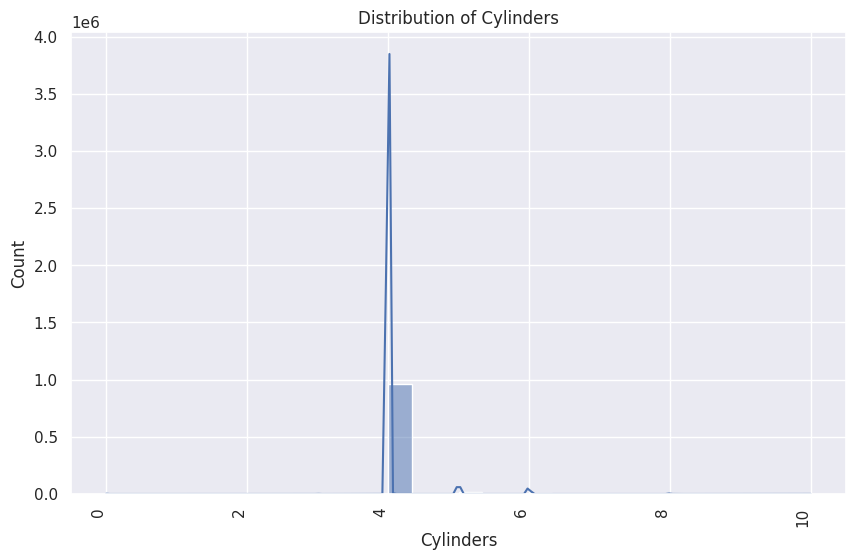

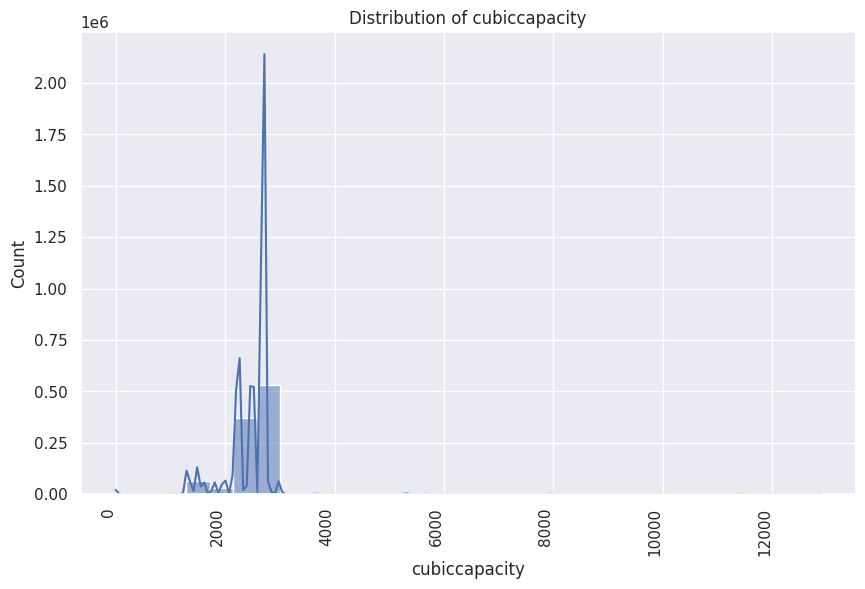

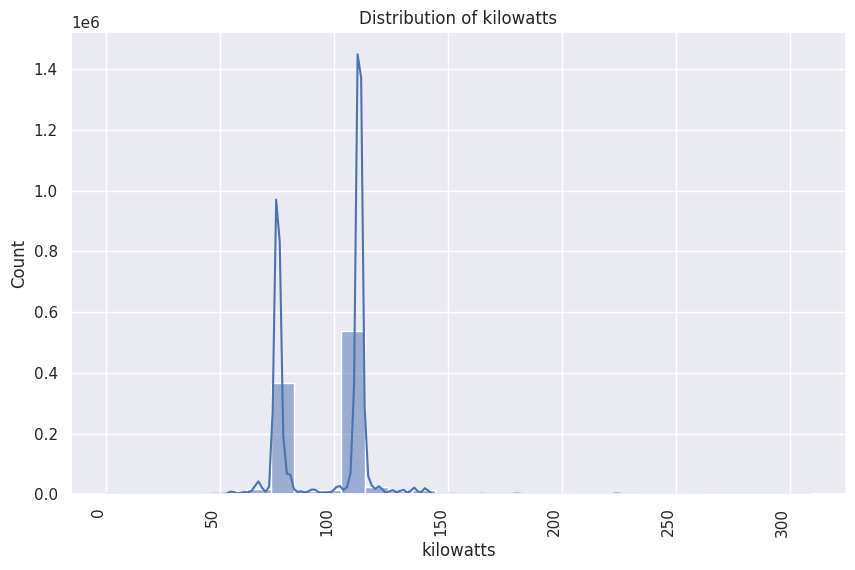

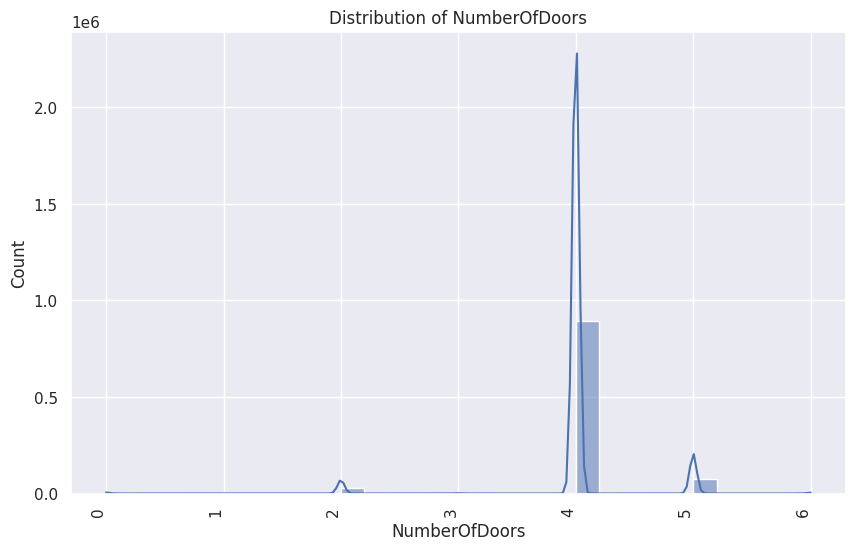

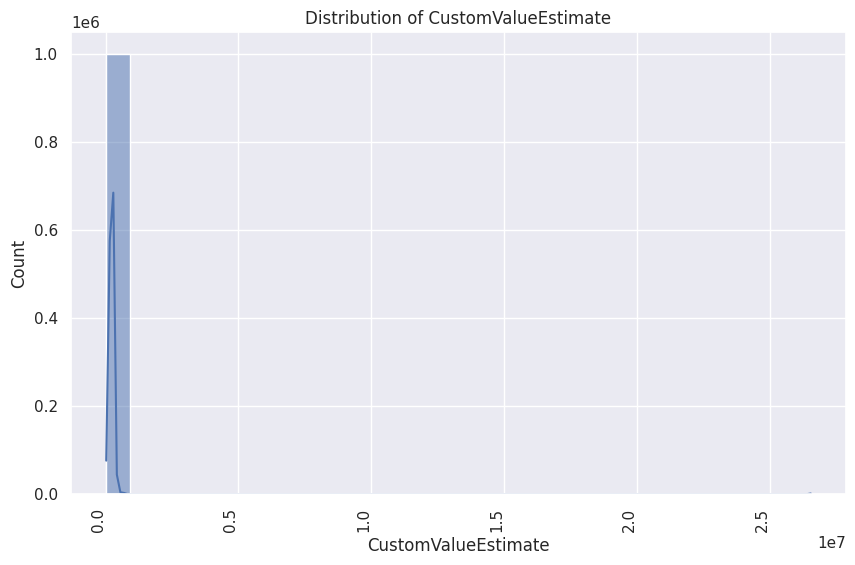

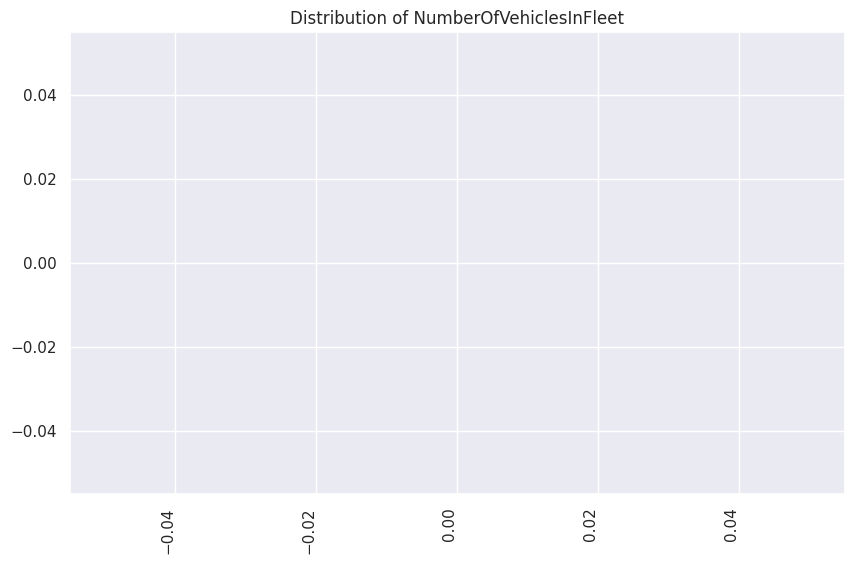

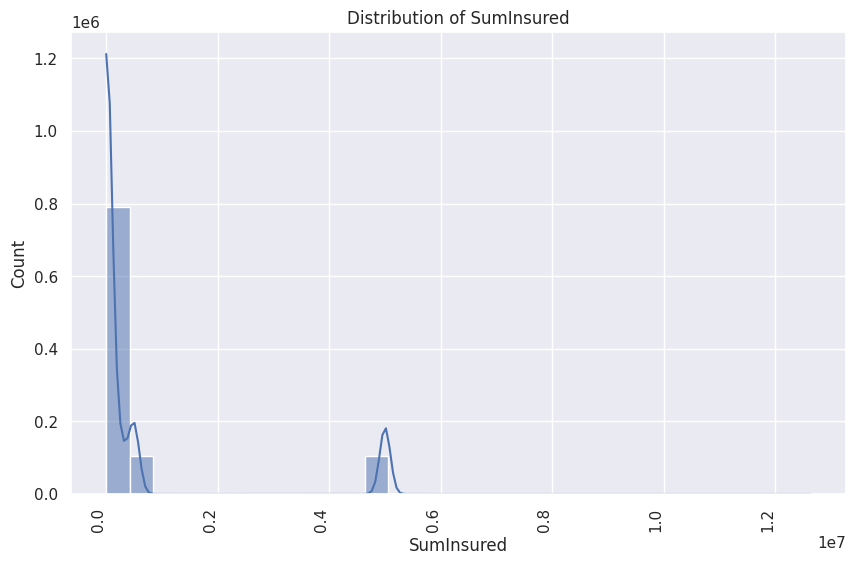

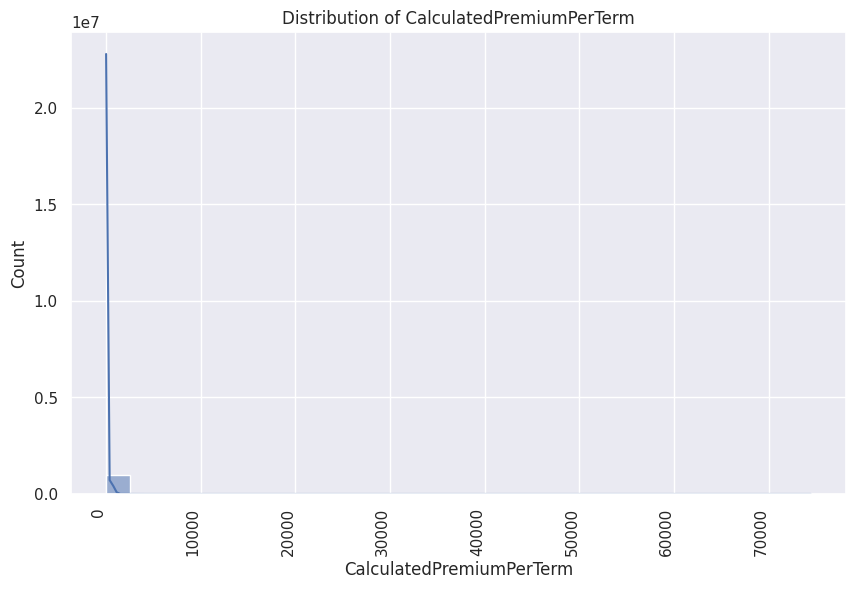

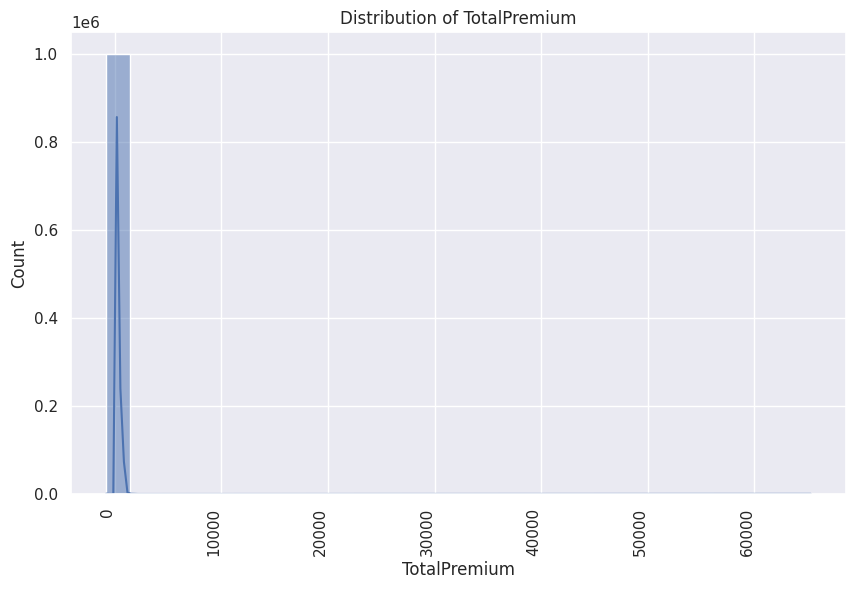

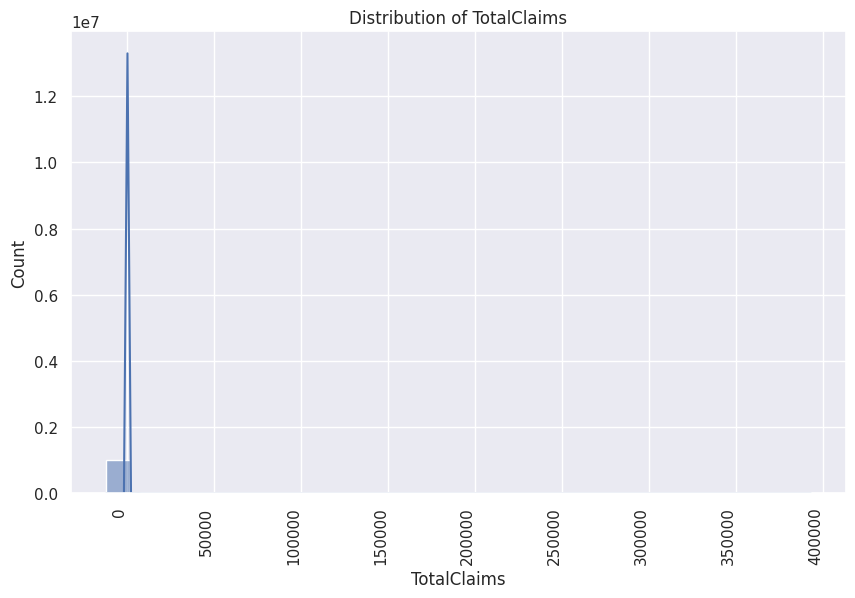

In [15]:
eda.plot_histograms(df,numerical_cols)

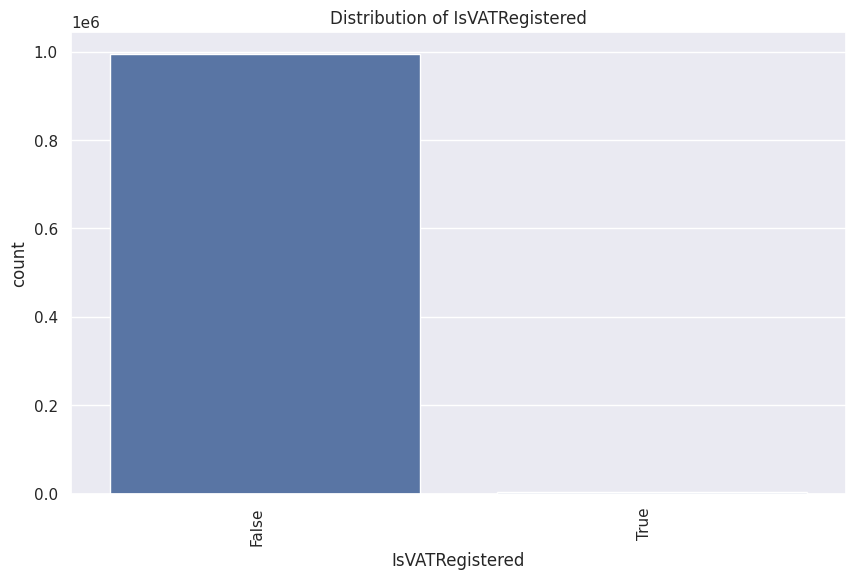

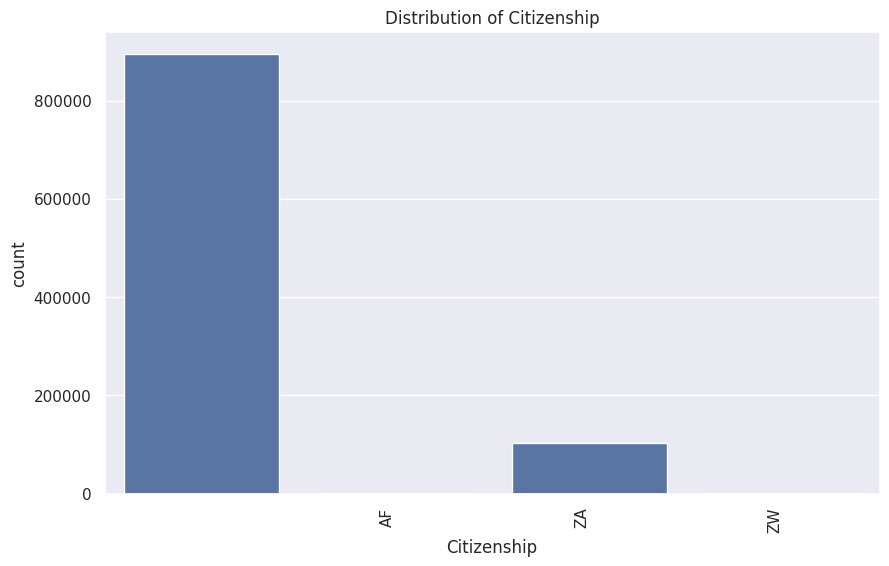

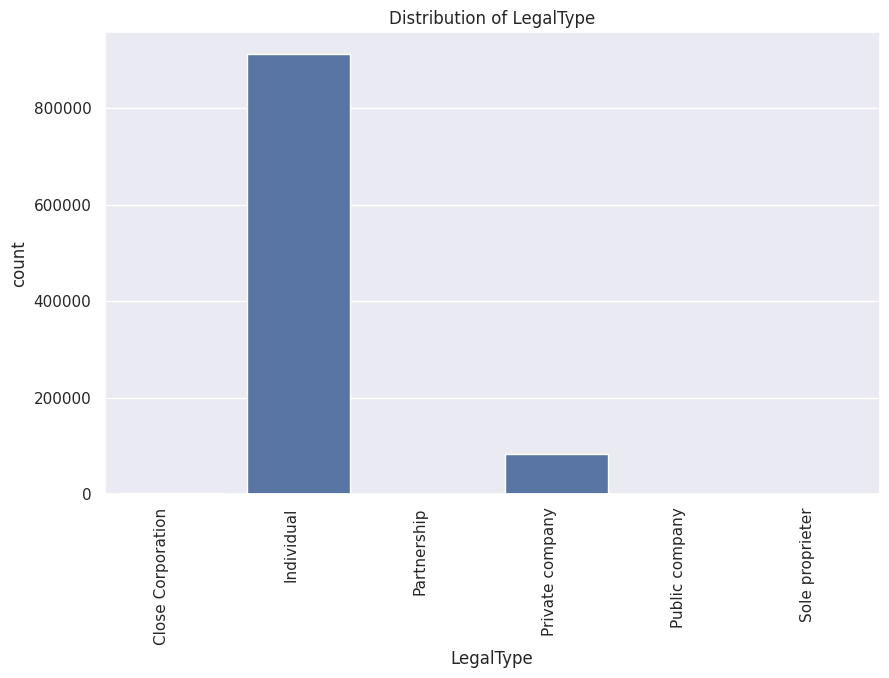

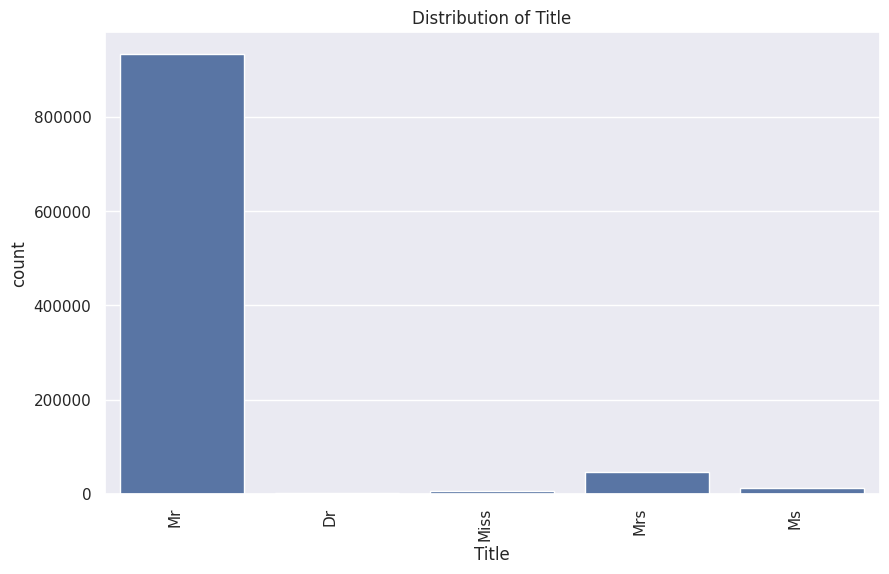

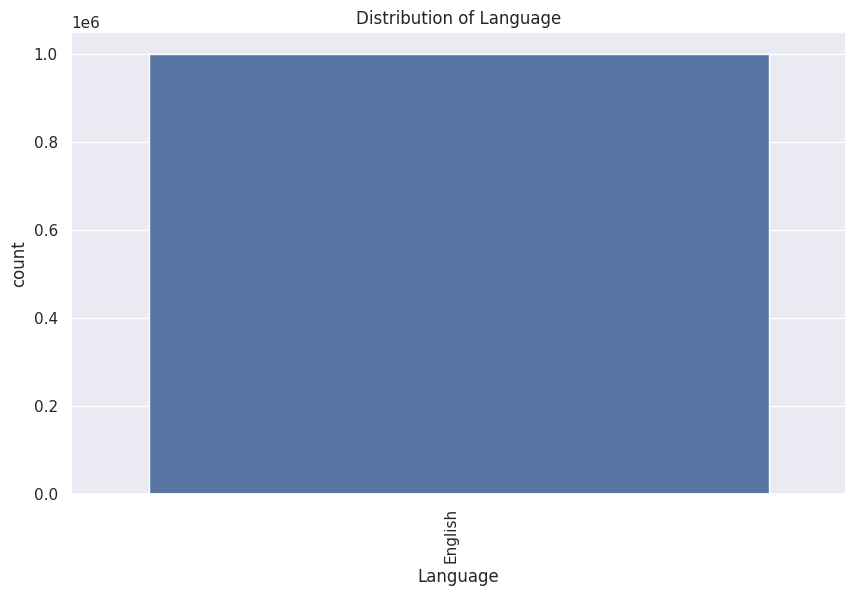

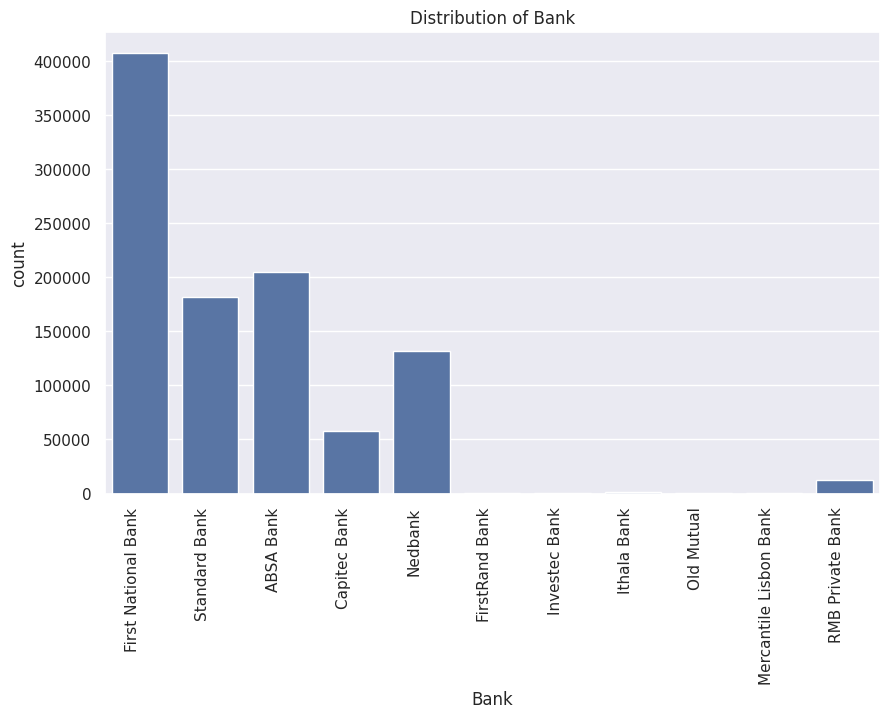

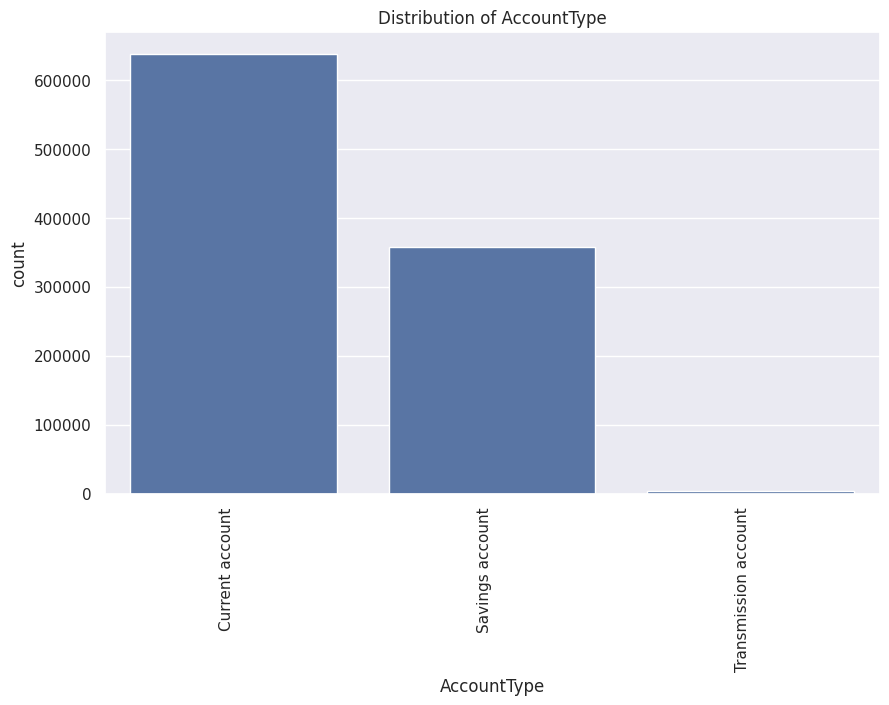

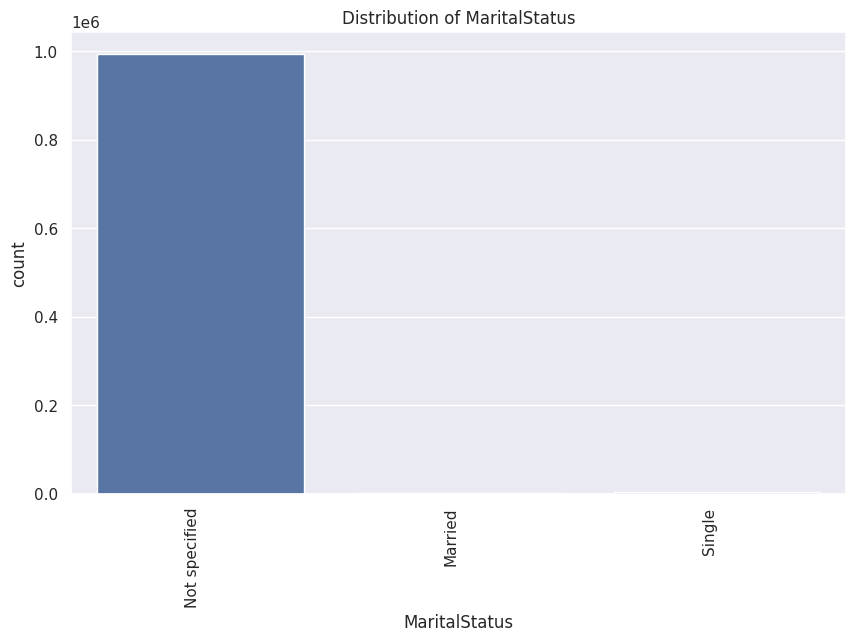

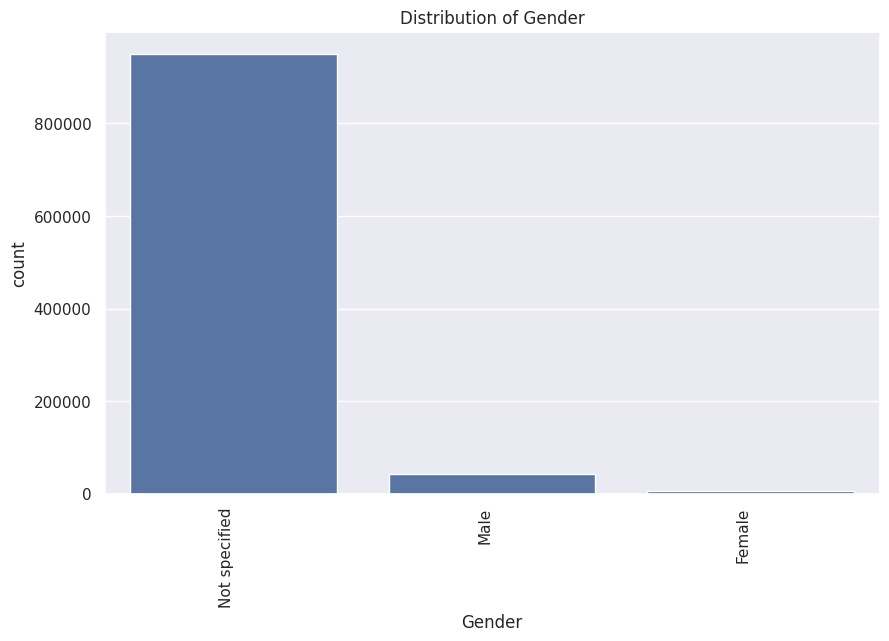

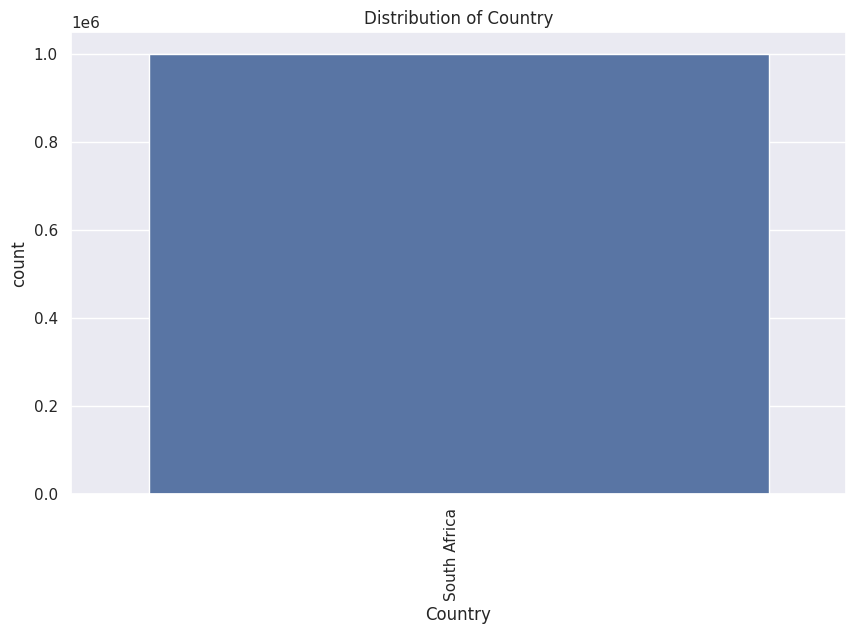

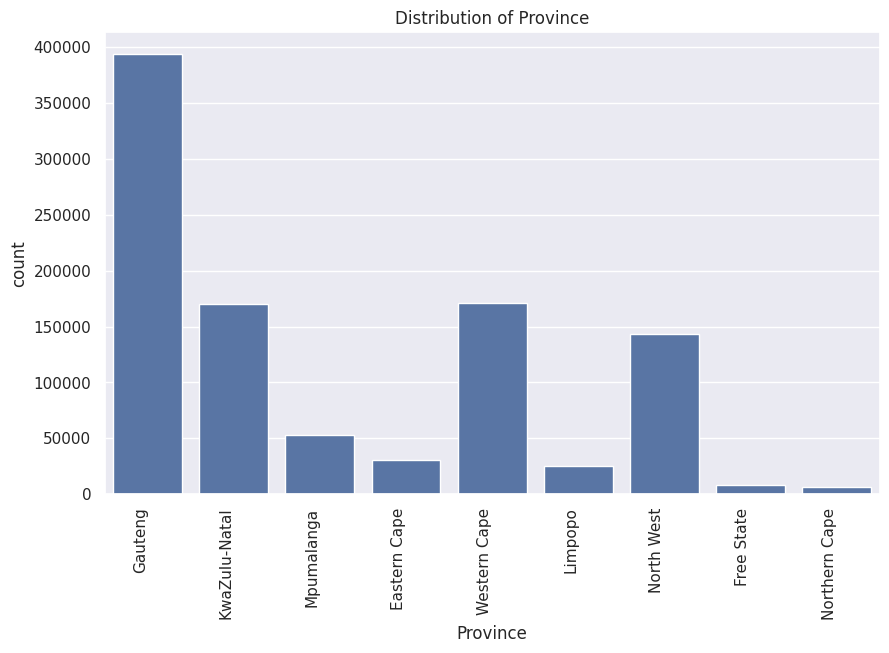

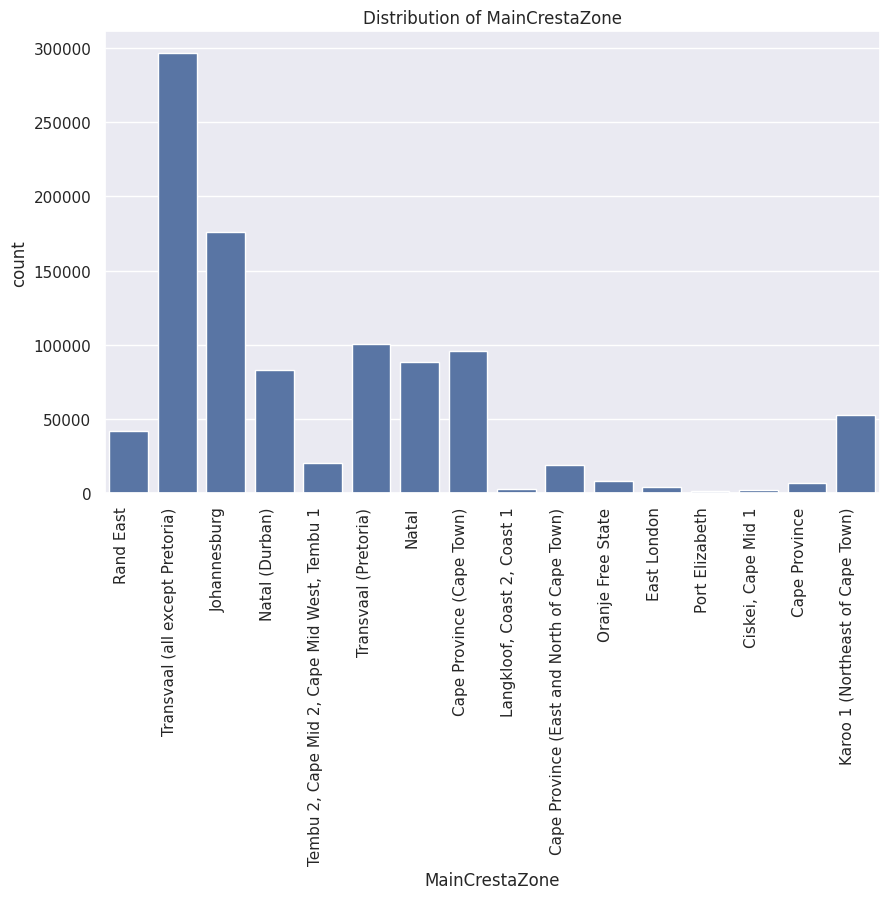

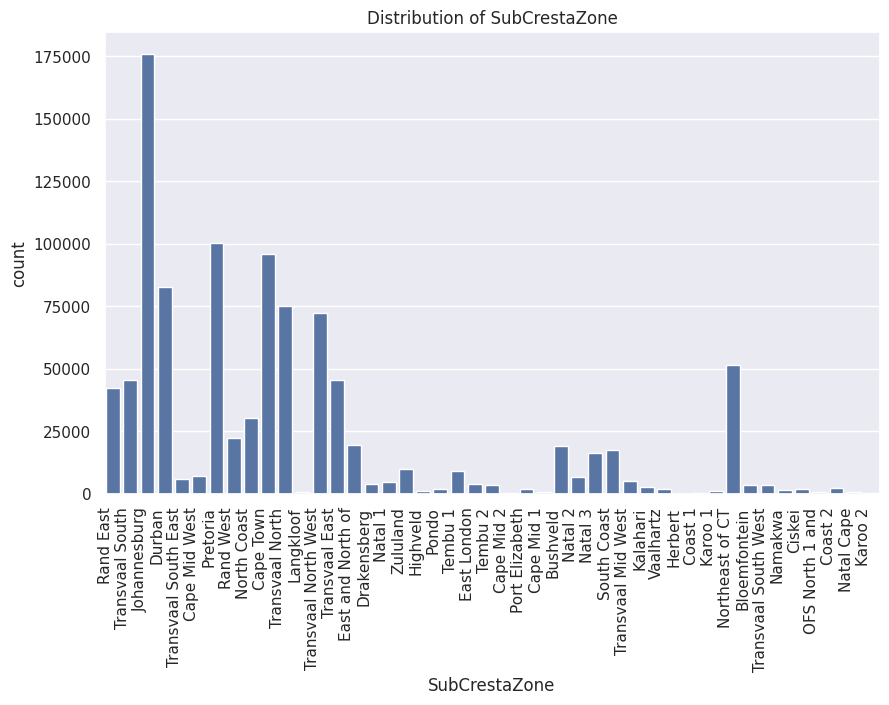

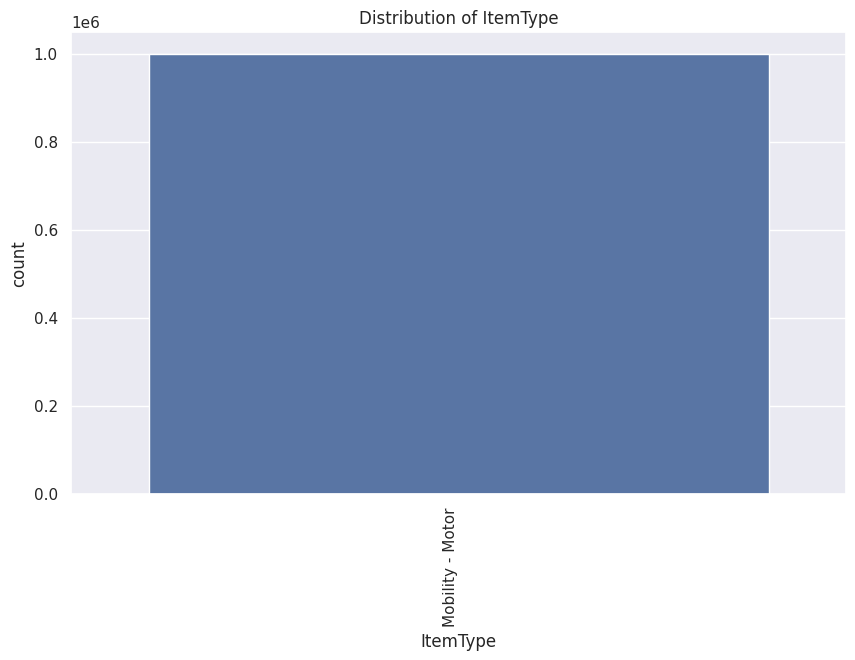

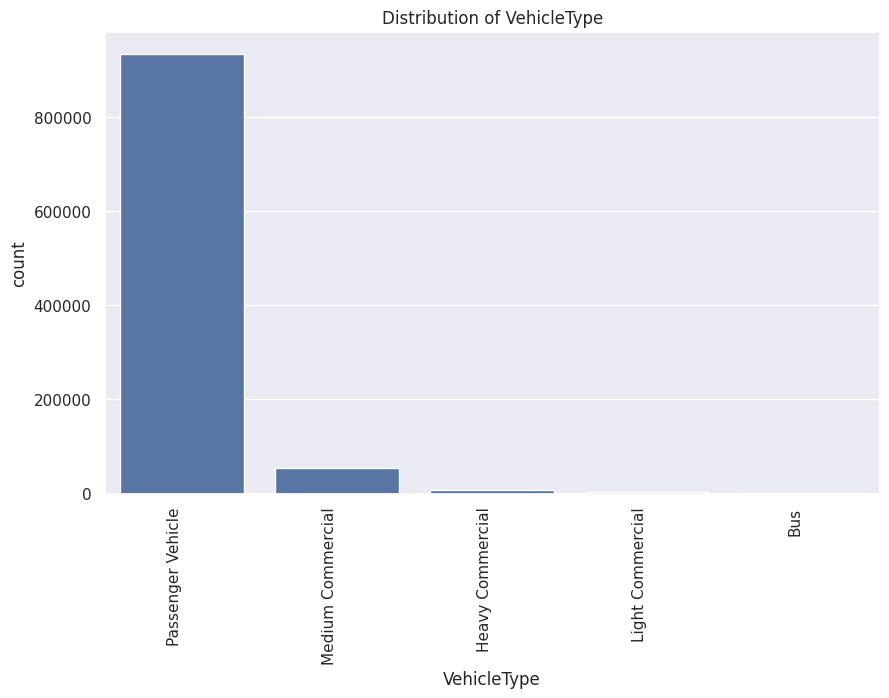

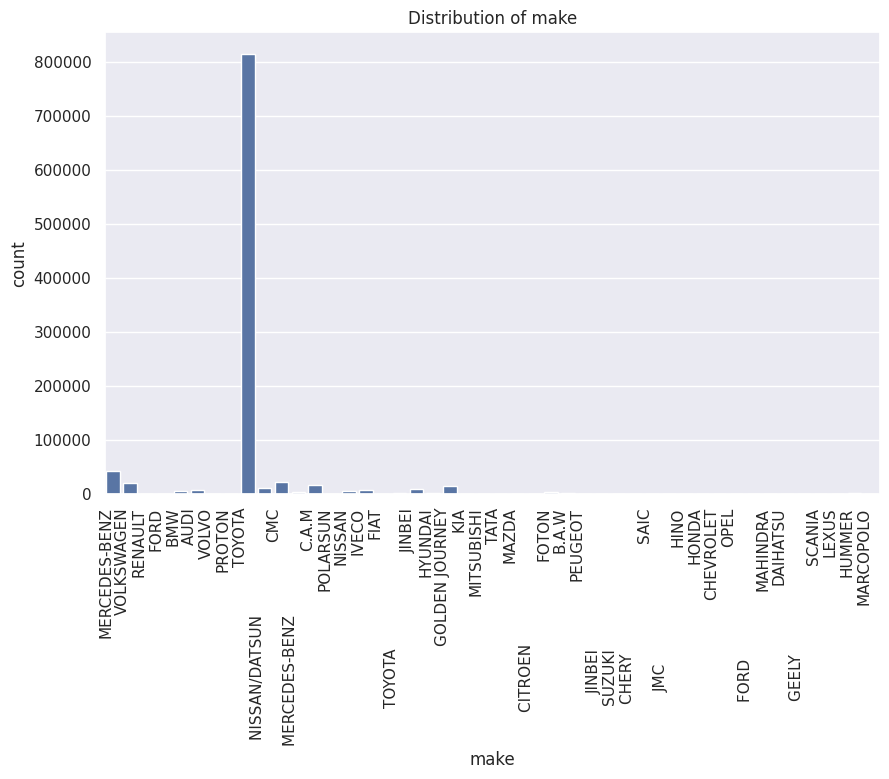

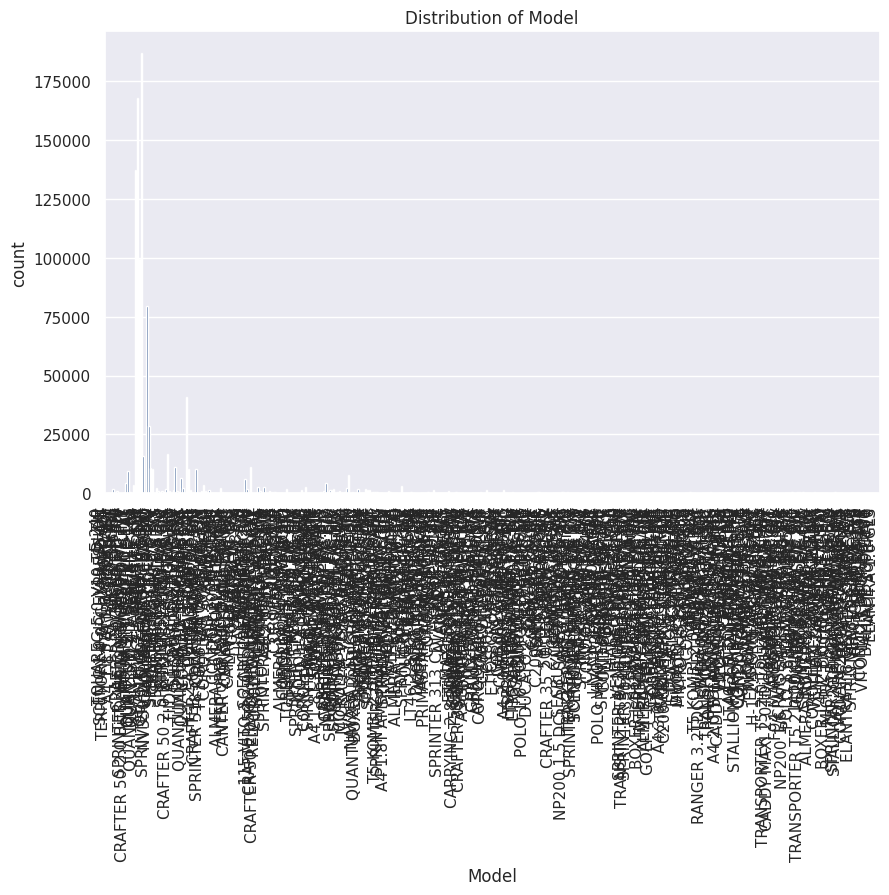

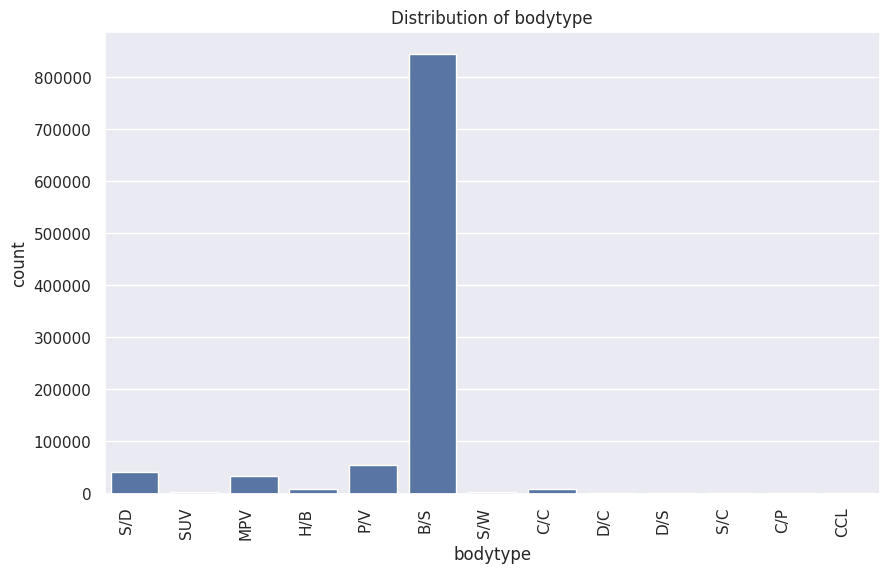

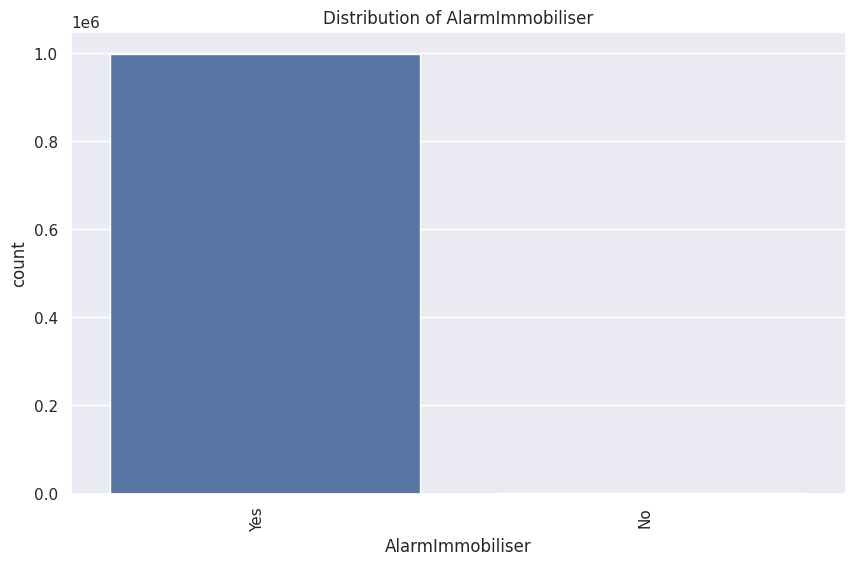

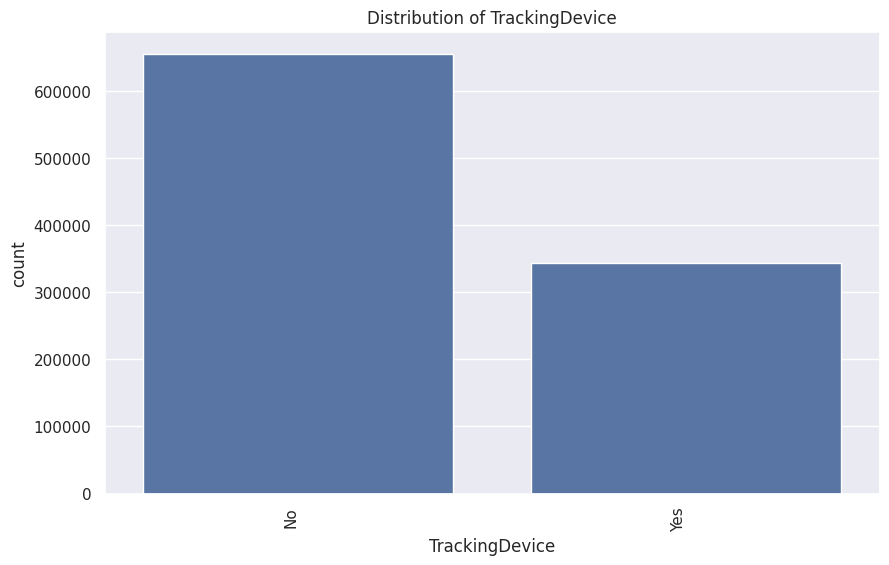

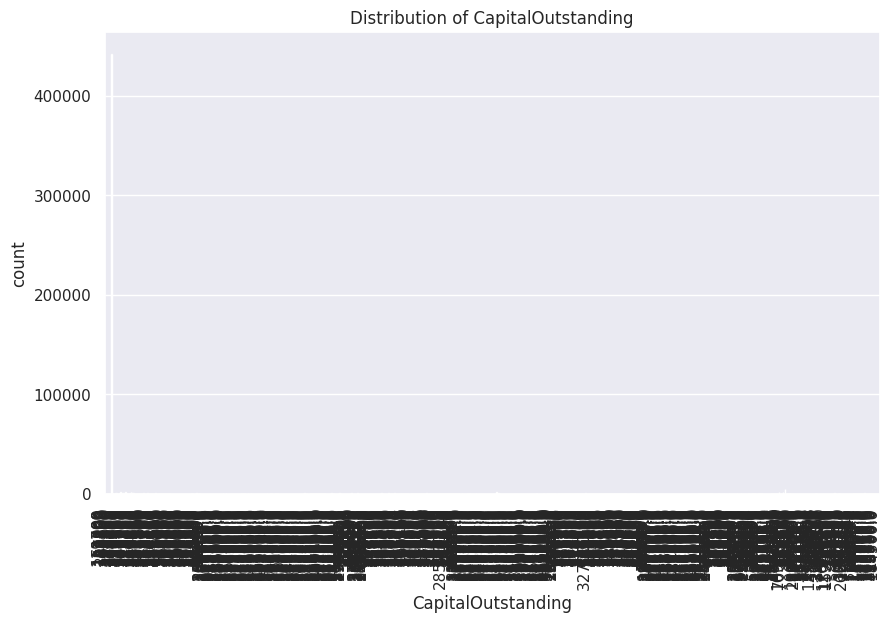

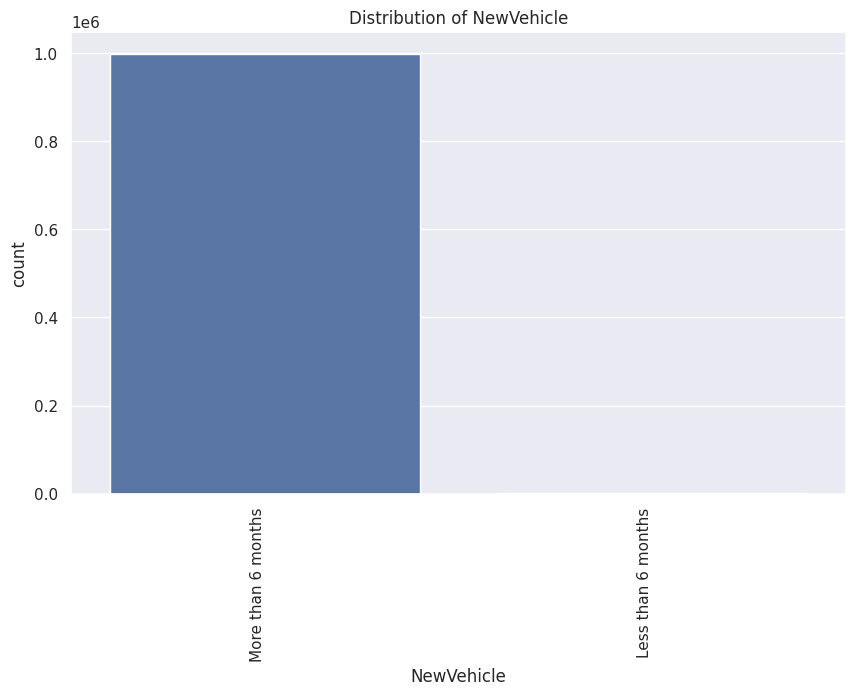

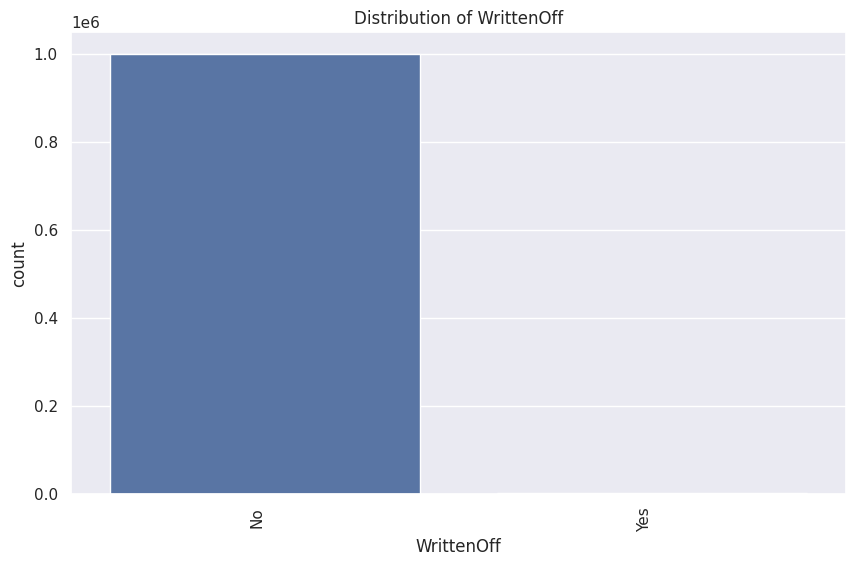

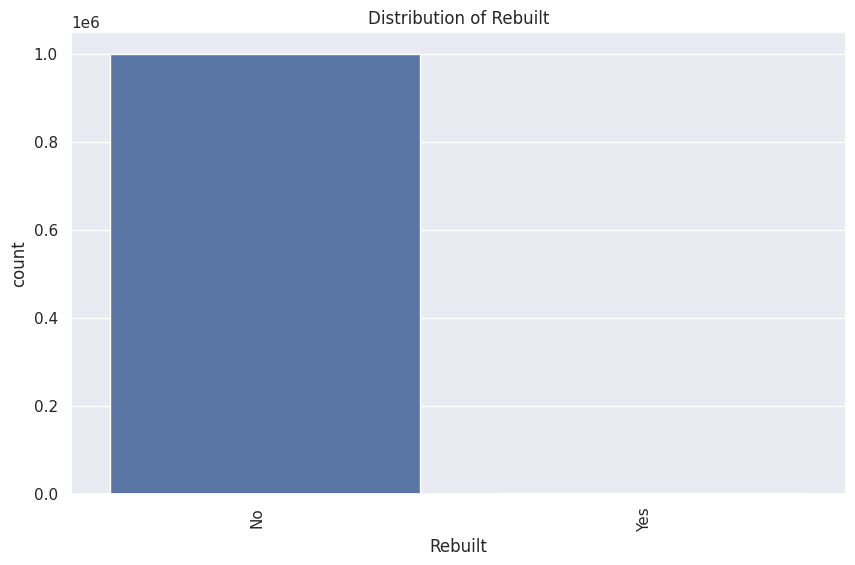

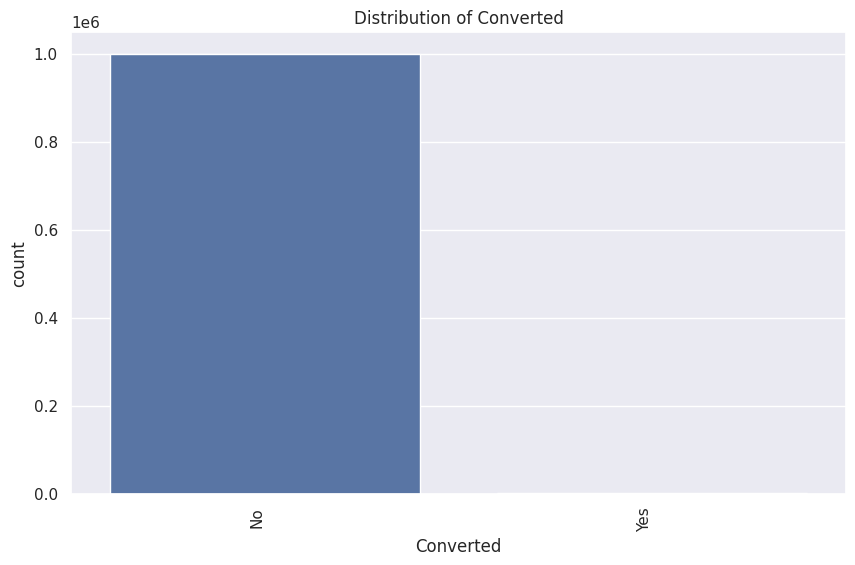

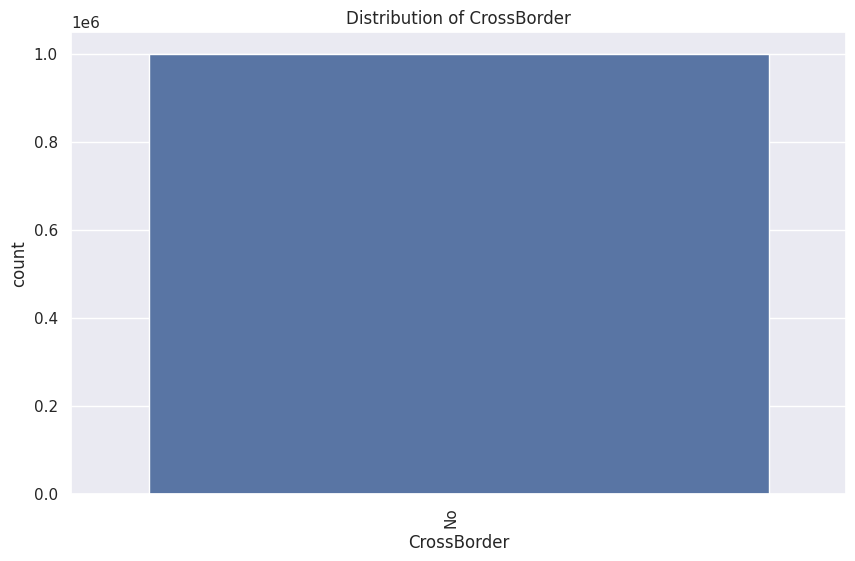

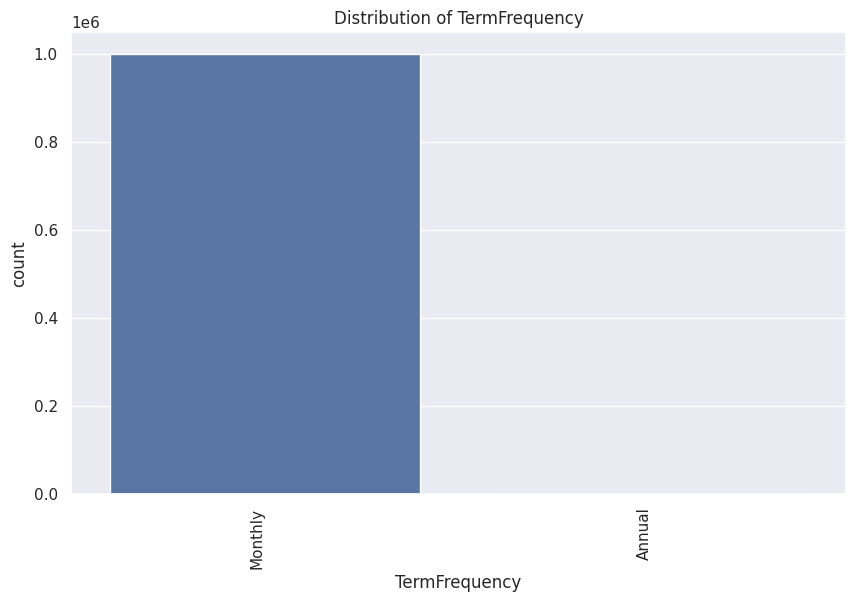

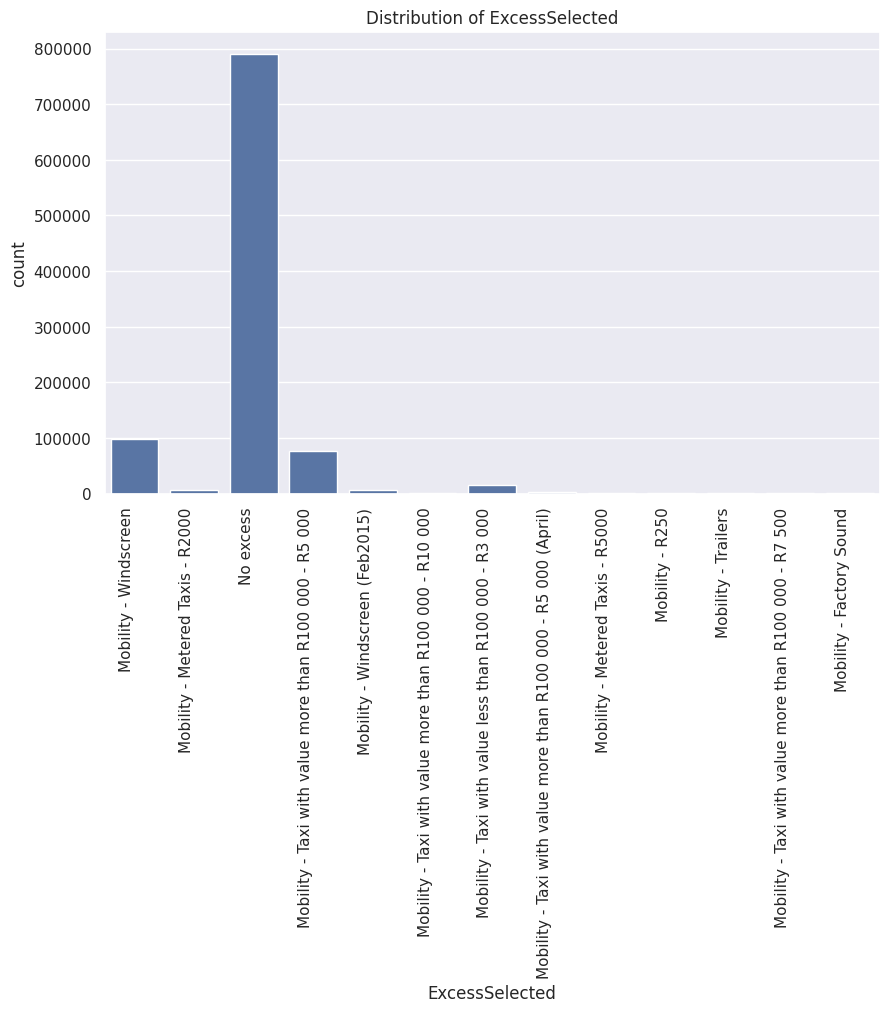

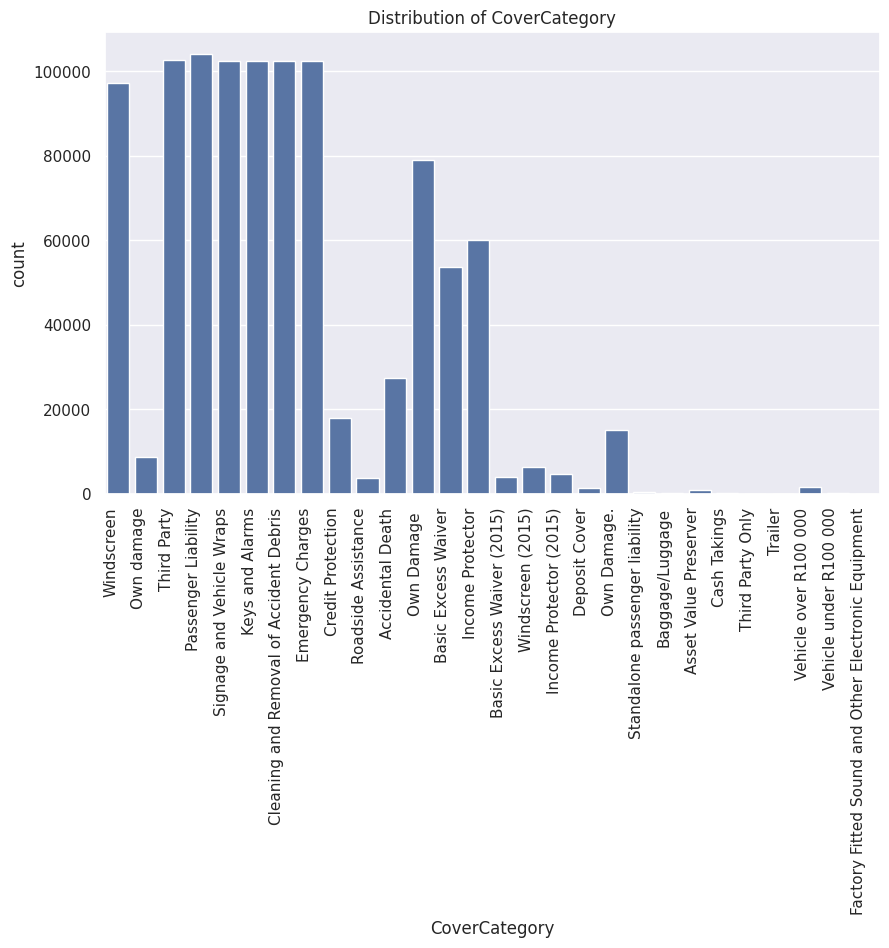

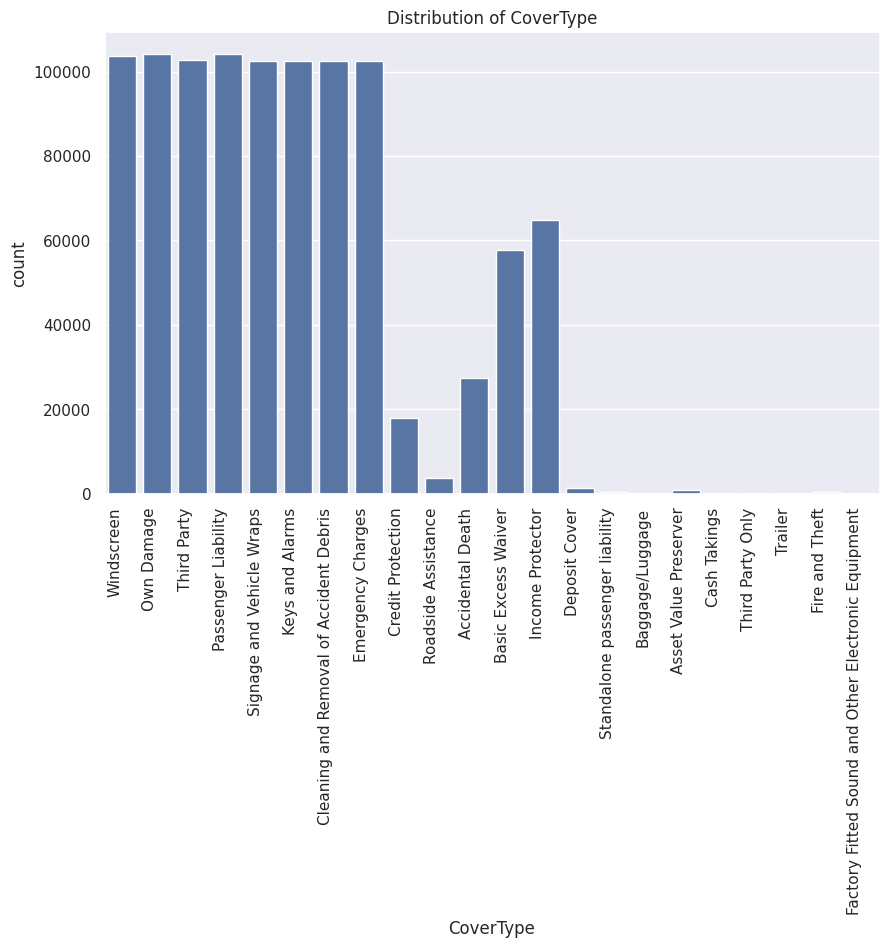

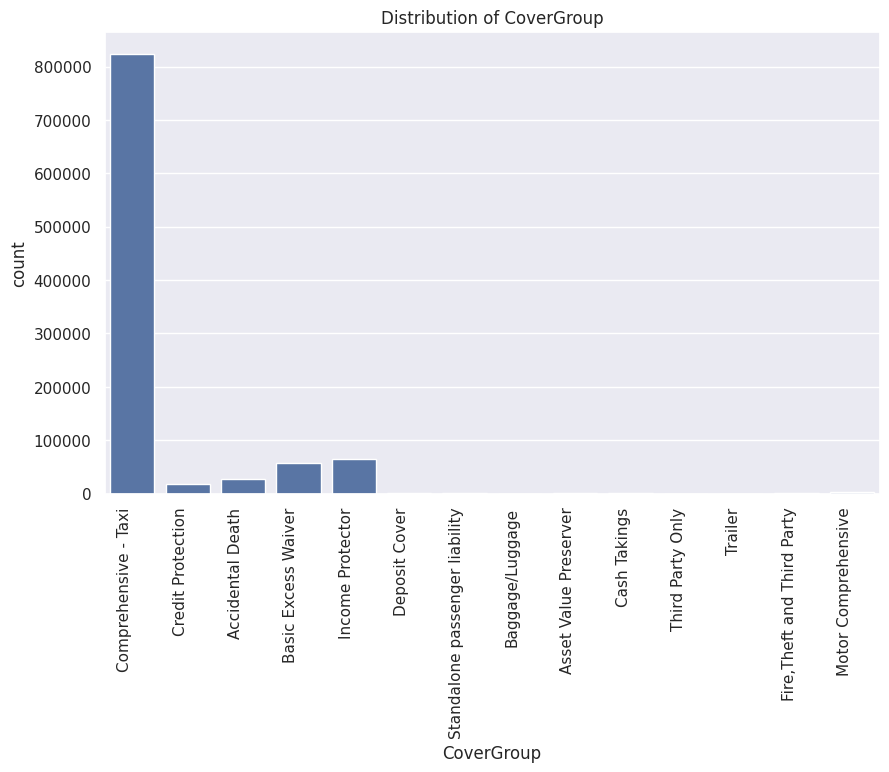

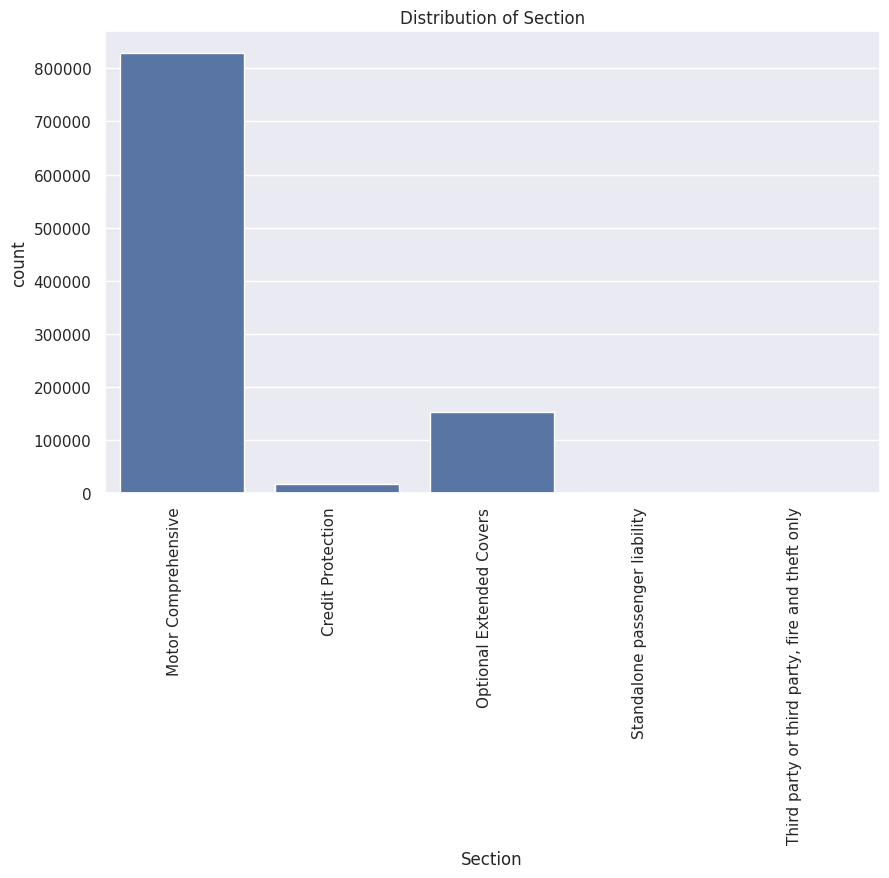

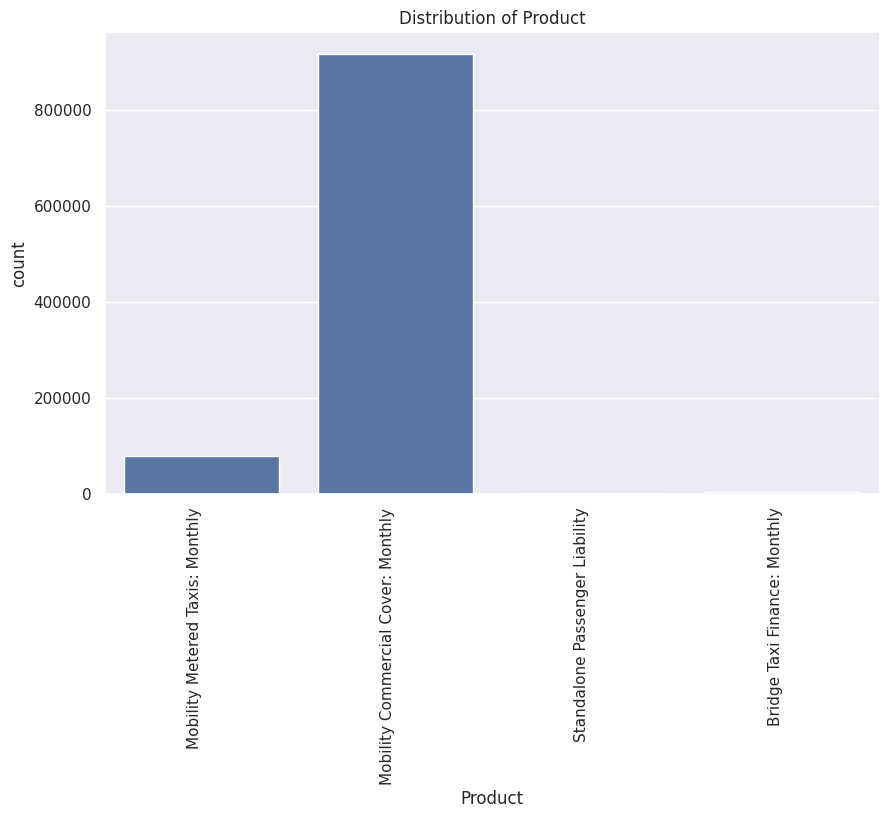

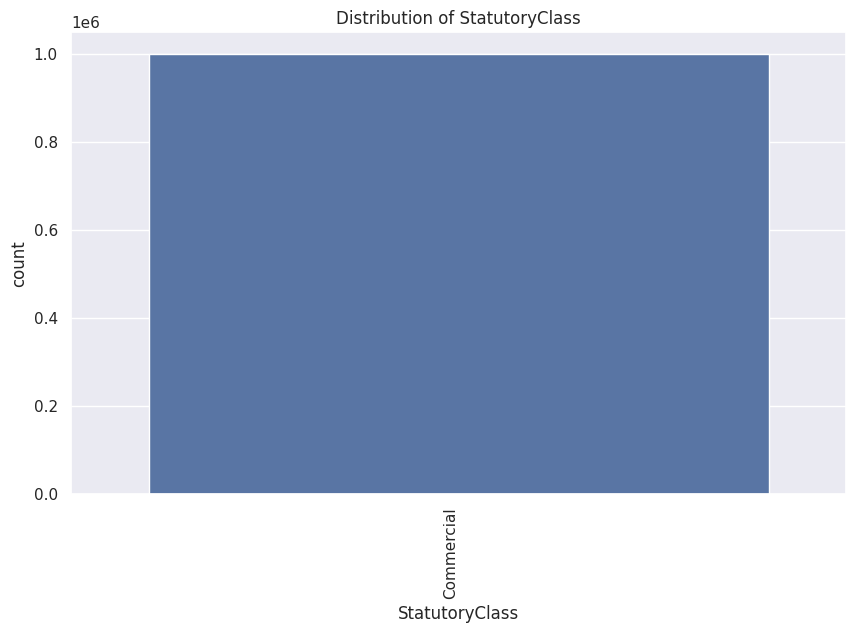

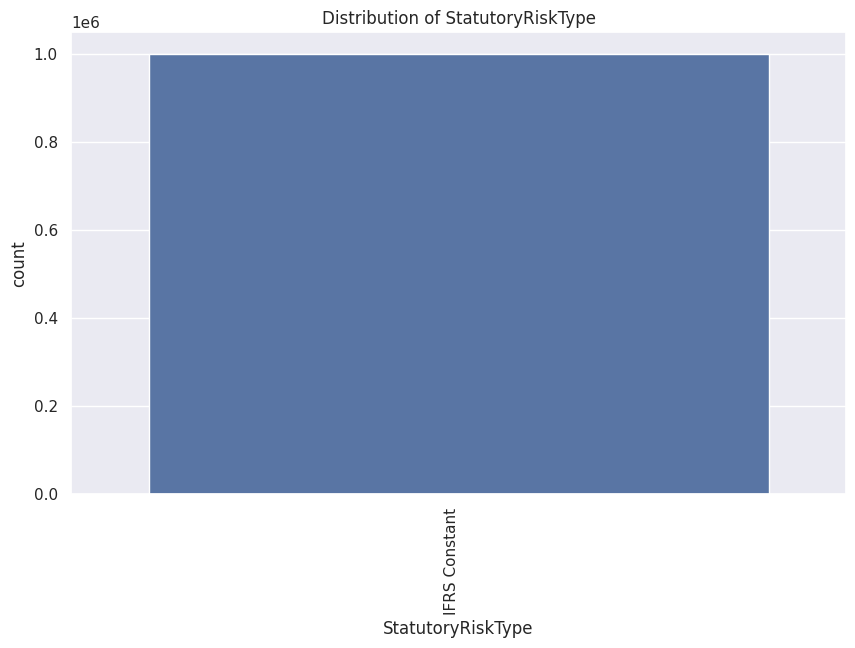

In [16]:
eda.plot_bar_charts(df,categorical_cols)

### Bivariate & Multivariate Analysis

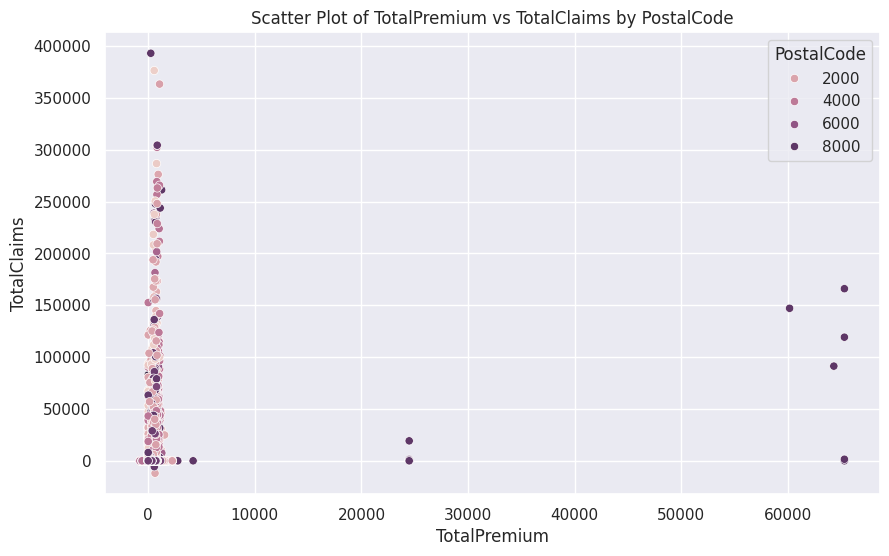

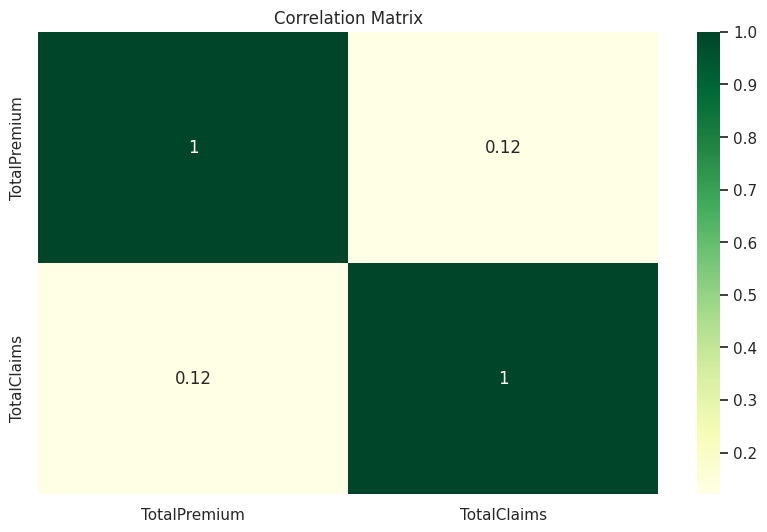

In [17]:
eda.plot_bivariate_analysis(df, 'TotalPremium', 'TotalClaims', 'PostalCode')

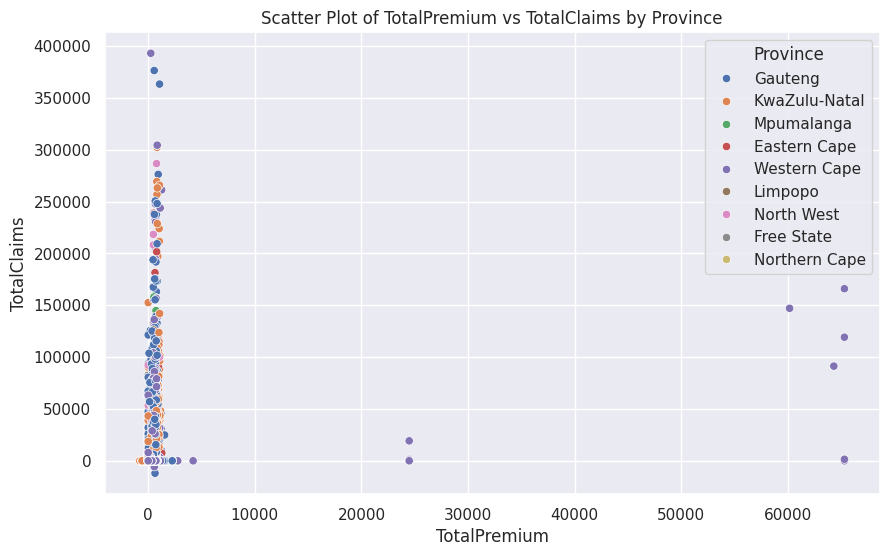

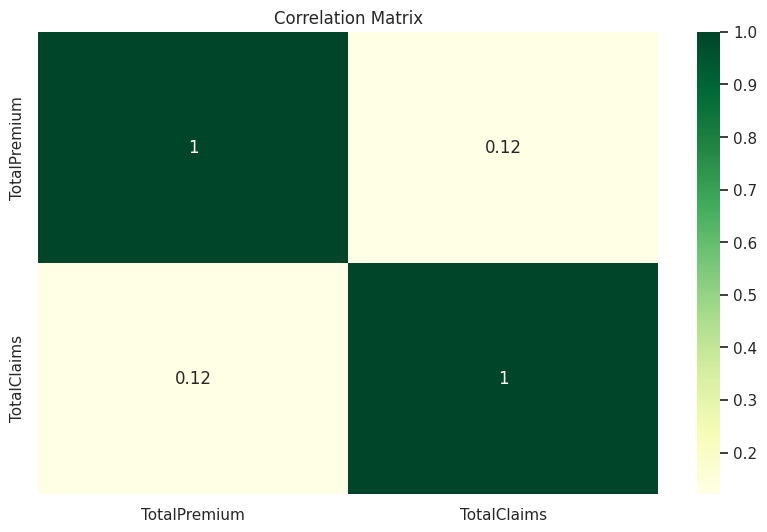

In [18]:
eda.plot_bivariate_analysis(df,'TotalPremium', 'TotalClaims', 'Province')

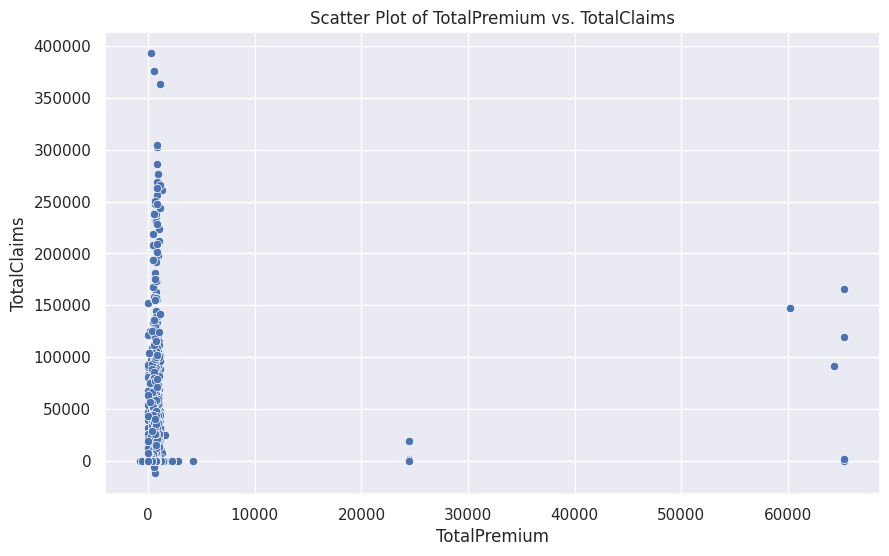

In [19]:
eda.scatter_plot(df,'TotalPremium', 'TotalClaims')